In [26]:
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier


In [27]:
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [28]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(random_state=42))
        ]
)


In [29]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [30]:
voting_clf.voting = "soft"
voting_clf.named_estimators["svc"].probability = True
voting_clf.fit(X_train, y_train)
voting_clf.score(X_test, y_test)

0.92

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
y_pred_fr = rnd_clf.predict(X_test)

In [33]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
mesh_points = np.c_[xx.ravel(), yy.ravel()]

In [34]:
voting_predictions = voting_clf.predict(mesh_points)
voting_predictions = voting_predictions.reshape(xx.shape)

In [35]:
rf_predictions = rnd_clf.predict(mesh_points)
rf_predictions = rf_predictions.reshape(xx.shape)

Text(0.5, 1.0, 'Decision Boundary for Voting Classifier')

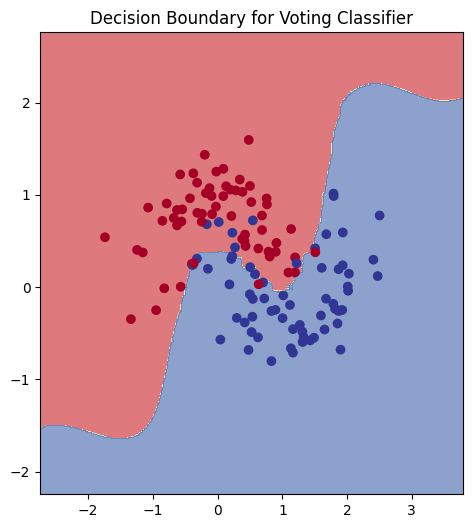

In [36]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.contourf(xx, yy, voting_predictions, cmap=plt.cm.RdYlBu, alpha=0.6)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.RdYlBu)
plt.title("Decision Boundary for Voting Classifier")

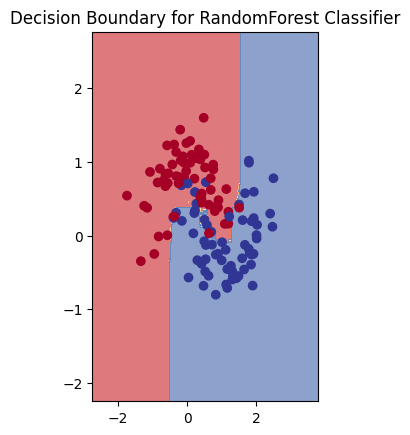

In [37]:
plt.subplot(122)
plt.contourf(xx, yy, rf_predictions, cmap=plt.cm.RdYlBu, alpha=0.6)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.RdYlBu)
plt.title("Decision Boundary for RandomForest Classifier")

plt.show()

('knn', KNeighborsClassifier(n_neighbors=3))